<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## TASK 1: Become familiar with the dataset

In [9]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [12]:
boston_df.describe(include = "all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [14]:
boston_df.shape

(506, 14)

## Task 2: Generate Descriptive Stats and Visualizations

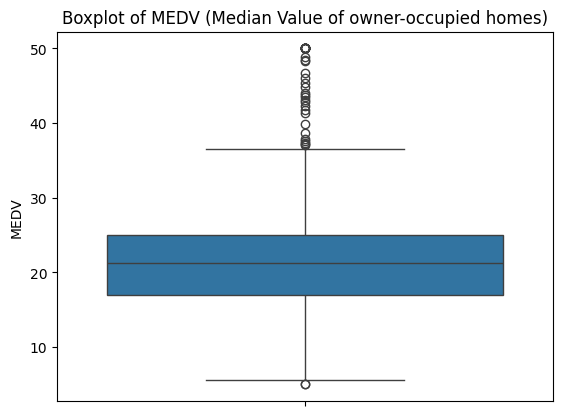

In [20]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Boxplot of MEDV (Median Value of owner-occupied homes)")
pyplot.show()

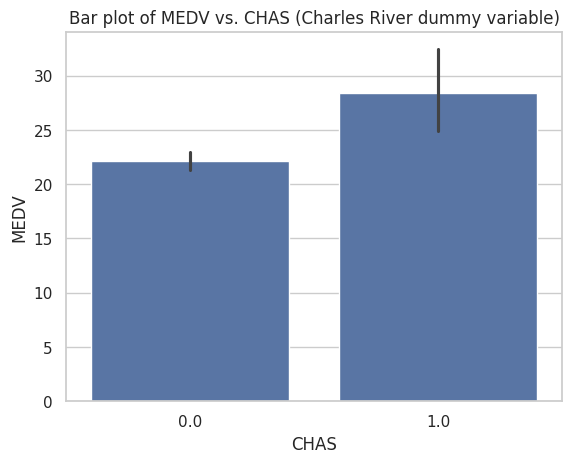

In [25]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)
ax.set_title("Bar plot of MEDV vs. CHAS (Charles River dummy variable)")
pyplot.show()

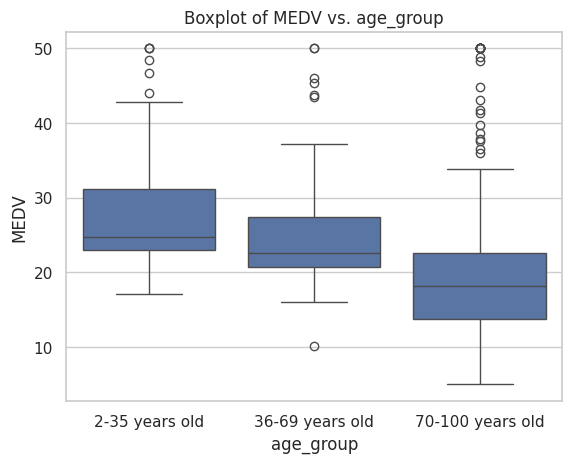

In [32]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '2-35 years old'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '36-69 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70-100 years old'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=['2-35 years old', '36-69 years old', '70-100 years old'])
ax.set_title("Boxplot of MEDV vs. age_group")
pyplot.show()

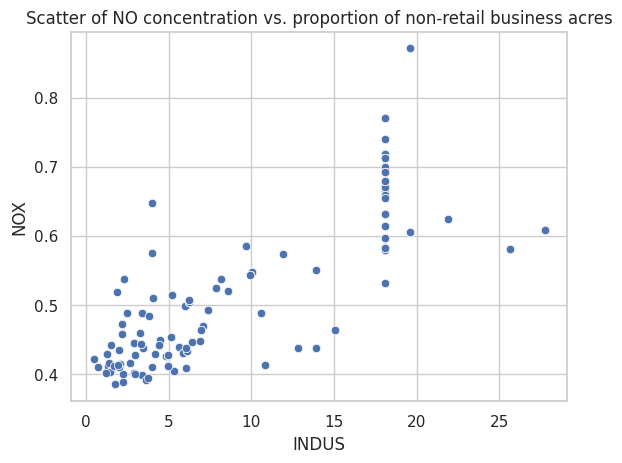

In [36]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title("Scatter of NO concentration vs. proportion of non-retail business acres")
pyplot.show()

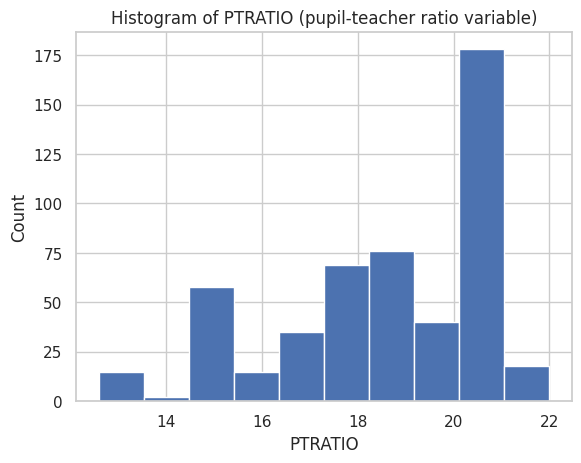

In [41]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title("Histogram of PTRATIO (pupil-teacher ratio variable)")
pyplot.xlabel('PTRATIO')
pyplot.ylabel('Count')
pyplot.show()

## Task 3: Use appropriate tests to answer the provided questions

#### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?
**H_0**: There is no effect of being bounded by the Charles river on the median value of houses  
**H_1**: The median value of houses is higher when bounded by the Charles river  
**Test**: T-test for independent samples (using alpha=0.05)  

In [43]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: The Hypothesis (H_1) is confirmed since pvalue < 0.05  

#### Question 2: Is there a difference in median values of houses (MEDV) for each AGE proportion?
**H_0**: There is no effect of AGE on the median value of houses  
**H_1**: There is a significant effect of AGE on the median value of houses  
**Test**: ANOVA using the age_group variable from above (with alpha = 0.05)  

In [45]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '2-35 years old']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == '36-69 years old']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70-100 years old']['MEDV']

In [46]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: The Hypothesis (H_1) is confirmed since p_value < 0.05  

#### Question 3: Can we conclude that there is no relationship between NO concentrations and PTRATIO?
**H_0**: There is no significant relationship between NO concentrations and PTRATIO  
**H_1**: There is a significant relationship between NO concentrations and PTRATIO  
**Test**: Pearson correlation coefficient (using alpha = 0.05)  

In [47]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['PTRATIO'])

PearsonRResult(statistic=0.18893267711276765, pvalue=1.885691747576957e-05)

**Conclusion**: The Hypothesis (H_1) is confirmed since p_value < 0.05  
Therefore, we cannot conclude that there is no relationship between NOX and PTRATIO.  

#### Question 4: What is the impact of DIS (weighted distance to the 5 Boston job centers) on MEDV?
**H_0**: There is no significant impact of DIS on MEDV   
**H_1**: There is a significant impact of DIS on MEDV  
**Test**: OLS (ordinary least squares) regression analysis (using alpha = 0.05)  

In [52]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # add an intercept (beta_0)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.21e-08
Time:                        20:43:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: The Hypothesis (H_1) is confirmed since p_value < 0.05  